In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [3]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as np
from VIGA_METALICA_VERIFICA import *
from FINITO_FEM_TOOLBOX import *

In [56]:
ELEMENTO_ANALISADO = 6

P1 = ['NORMAL', 200E9, 20E9] #E MPa              
P2 = ['NORMAL', 250E6, 25E6] #Fy MPa               
P3 = ['NORMAL', 10000, 1500] #Fy N
P4 = ['NORMAL', 1, 0.05] #Incerteza de Modelo adimensional 
P5 = ['NORMAL', 1, 0.05] #Incerteza de Modelo adimensional 
POP = [10]


#carga G, carga Q, tensao escoamento (Fy) e modulo de elasticidade (ES)
#carta_total = carga G + carga Q

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 3,
        'D': 5, #variables
        'VARS': [P1, P2, P3, P4, P5],
        'MODEL': 'MCS'}

In [72]:
def OBJ(X):
    
    E = X[0]
    FY = X[1]
    F1 = X[2]
    M1 = X[3]
    M2 = X[4]
   
    # auxiliaries para tranformar em metro
    alfa = 0.001 #m
    beta = 0.000001 #m3
    gamma = 0.00000001 #m4
    
    VIGA = {'H_W': 139 * alfa, #m           
        'T_W': 5.8 * alfa, #m
        'B_F': 102 * alfa, #m
        'T_F': 7.1 * alfa, #m
        'W_C': 1, #m 
        'W_T': 1, #m
        'PARAMETRO_PERFIL': 'DUPLA SIMETRIA', #"DUPLA SIMETRIA, MONO SIMETRIA "
        'TIPO_PERFIL': 'LAMINADO', #"SOLDADO, LAMINADO "
        'GAMMA_A1': 1.1,
        'Z': 139.4 * beta, #m3
        'INERCIA':939 * gamma, #m4   
        'E_S': E , #Pa 
        'F_Y': FY} #N
    
    AREA = 2 * (VIGA['T_F'] * VIGA['B_F']) + (VIGA['T_W'] * VIGA['H_W']) #m2
    X_GC =  VIGA['B_F'] / 2 #m
    Y_GC = (( VIGA['T_F'] * 2) + VIGA['H_W']) / 2 #m
    
    FRAME_00 = {
        "TYPE_ELEMENT": 0,
        "TYPE_SOLUTION": 0,
        "N_NODES": 26,
        "N_MATERIALS": 1,
        "N_SECTIONS": 1,
        "N_ELEMENTS": 27,
        "N_DOFPRESCRIPTIONS": 6,
        "N_DOFLOADED": 24,
        "N_DOFSPRINGS": 0,
        "COORDINATES": #X,Y
        np.array([
        [0.0,0.0],
        [5.25,0.0],
        [0.0,3.0],
        [0.75,3.0],
        [1.5,3.0],
        [2.25,3.0],
        [3.0,3.0],
        [3.75,3.0],
        [4.5,3.0],
        [5.25,3.0],
        [0.0,6.0],
        [0.75,6.0],
        [1.5,6.0],
        [2.25,6.0],
        [3.0,6.0],
        [3.75,6.0],
        [4.5,6.0],
        [5.25,6.0],
        [0.0,9.0],
        [0.75,9.0],
        [1.5,9.0],
        [2.25,9.0],
        [3.0,9.0],
        [3.75,9.0],
        [4.5,9.0],
        [5.25,9.0]]),

        "ELEMENTS": #NODE 1,NODE 2,MATERIAL ID,SECTION ID,HINGE ID NODE 1,HINGE ID NODE 2
        np.array([
        [0,2,0,0,0,0],
        [1,9,0,0,0,0],
        [2,3,0,0,0,0],
        [3,4,0,0,0,0],
        [4,5,0,0,0,0],
        [5,6,0,0,0,0],
        [6,7,0,0,0,0],
        [7,8,0,0,0,0],
        [8,9,0,0,0,0],
        [2,10,0,0,0,0],
        [9,17,0,0,0,0],
        [10,11,0,0,0,0],
        [11,12,0,0,0,0],
        [12,13,0,0,0,0],
        [13,14,0,0,0,0],
        [14,15,0,0,0,0],
        [15,16,0,0,0,0],
        [16,17,0,0,0,0],
        [10,18,0,0,0,0],
        [17,25,0,0,0,0],
        [18,19,0,0,0,0],
        [19,20,0,0,0,0],
        [20,21,0,0,0,0],
        [21,22,0,0,0,0],
        [22,23,0,0,0,0],
        [23,24,0,0,0,0],
        [24,25,0,0,0,0]]),

        "MATERIALS": #YOUNG, POISSON,DENSITY, THERMAL COEFFICIENT
        np.array([[VIGA['E_S'], 1, 1, 1E-8]]),
        "SECTIONS": #AREA, INERTIA 1, INERTIA 2, X GC,Y GC
        np.array([[AREA , VIGA['INERCIA'], VIGA['INERCIA'], X_GC, X_GC]]),
        #np.array([[0.0450,0.000377,0.000377,0.075,0.15]]),
        "PRESCRIBED DISPLACEMENTS": #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
        [0,0,0],
        [0,1,0],
        [0,2,0],
        [1,0,0],
        [1,1,0],
        [1,2,0]]),
        "ELEMENT LOADS": None,
        "NODAL LOADS":  #NODE,DIRECTION(X=0,Y=1,Z=2),VALUE
        np.array([
         [2,1,-F1,0],
        [3,1,-F1,0],
        [4,1,-F1,0],
        [5,1,-F1,0],
        [6,1,-F1,0],
        [7,1,-F1,0],
        [8,1,-F1,0],
        [9,1,-F1,0],
        [10,1,-F1,0],
        [11,1,-F1,0],
        [12,1,-F1,0],
        [13,1,-F1,0],
        [14,1,-F1,0],
        [15,1,-F1,0],
        [16,1,-F1,0],
        [17,1,-F1,0],
        [18,1,-F1,0],
        [19,1,-F1,0],
        [20,1,-F1,0],
        [21,1,-F1,0],
        [22,1,-F1,0],
        [23,1,-F1,0],
        [24,1,-F1,0],
        [25,1,-F1,0]]),
        "SPRINGS": None}
    
    FRAME_00_RESULTS = MEF1D(DICTIONARY = FRAME_00)   
    ELEMENT = pd.DataFrame(data = FRAME_00_RESULTS[ELEMENTO_ANALISADO])
    M_SD = max(ELEMENT['M'].max(),abs(ELEMENT['M'].min()))
    V_SD = max(ELEMENT['V'].max(),abs(ELEMENT['V'].min()))
    N_SD = max(ELEMENT['N'].max(),abs(ELEMENT['N'].min()))
    D_SD = min(ELEMENT['UX'].max(),abs(ELEMENT['UX'].min()))
    L_MAX = FRAME_00['COORDINATES'][1][0]
           
    print(L_MAX)
    ESFORCOS = {'M_SD': M_SD,
                'V_SD': V_SD,
                'D_SD': D_SD,
                'L_MAX': L_MAX}
    
    R_0, S_0 = VERIFICACAO_VIGA_METALICA_MOMENTO_FLETOR(VIGA, ESFORCOS) 
    G_0 = -M1 * R_0 + M2 * S_0

    R_1, S_1 = VERIFICACAO_VIGA_METALICA_ESFORCO_CORTANTE(VIGA, ESFORCOS)
    G_1 = -M1 * R_1 + M2 * S_1
    
    R_2, S_2 = VERIFICACAO_VIGA_METALICA_DEFORMACAO(VIGA, ESFORCOS)
    G_2 = -M1 * R_2 + M2 * S_2
    
    R = [R_0, R_1, R_2] 
    S = [S_0, S_1, S_2] 
    G = [G_0, G_1, G_2]
    
    return R, S, G

In [58]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


In [59]:
RESULTS_TEST[0]['TOTAL RESULTS']

,X_0,X_1,X_2,X_3,X_4,R_0,R_1,R_2,S_0,S_1,S_2,G_0,G_1,G_2,I_0,I_1,I_2
0,1.950725e+11,2.757403e+08,10358.422806,1.000204,0.923040,34943.820141,121255.557235,0.002143,19029.977180,10358.0,7.900635e-08,-17385.517246,-111719.446032,-0.002143,0.0,0.0,0.0
1,1.946190e+11,2.485489e+08,11635.701231,0.996330,1.037898,31497.930417,109298.270455,0.002143,21376.113582,11635.0,8.895355e-08,-9196.106760,-96821.224293,-0.002135,0.0,0.0,0.0
2,2.140782e+11,2.817734e+08,11307.288067,0.970228,1.038178,35708.372833,123908.566046,0.002143,20773.503762,11307.0,7.858816e-08,-13078.682360,-108480.930752,-0.002079,0.0,0.0,0.0
3,1.974957e+11,2.301500e+08,8714.668596,0.954948,0.942125,29166.287250,101207.435212,0.002143,16009.579180,8714.0,6.565110e-08,-12769.270943,-88438.184691,-0.002046,0.0,0.0,0.0
4,2.029917e+11,2.709749e+08,7459.380714,0.928255,1.015197,34339.909474,119159.978557,0.002143,13703.861728,7459.0,5.467446e-08,-17964.070939,-103038.465129,-0.001989,0.0,0.0,0.0
5,2.079871e+11,2.703904e+08,9141.040813,1.028634,1.003301,34265.834219,118902.936360,0.002143,16794.074281,9141.0,6.539422e-08,-18397.477657,-113136.381928,-0.002204,0.0,0.0,0.0
6,2.113562e+11,2.445480e+08,8852.922603,1.060318,1.084562,30990.895046,107538.850443,0.002143,16263.116238,8852.0,6.231728e-08,-15221.836097,-104424.808080,-0.002272,0.0,0.0,0.0
7,1.903389e+11,2.425155e+08,11012.799071,1.005125,0.986565,30733.328290,106645.090102,0.002143,20231.522369,11012.0,8.608369e-08,-10931.131325,-96327.617206,-0.002154,0.0,0.0,0.0
8,2.059954e+11,1.997670e+08,10402.386260,1.080083,1.055191,25315.923149,87846.616539,0.002143,19110.815082,10402.0,7.513487e-08,-7177.723017,-83905.512483,-0.002314,0.0,0.0,0.0
9,1.929635e+11,2.978768e+08,10449.691619,0.982187,1.063646,37749.118181,130989.981682,0.002143,19197.164660,10449.0,8.057153e-08,-16657.712972,-117542.627797,-0.002105,0.0,0.0,0.0


In [47]:
DADOS = RESULTS_TEST[0]['TOTAL RESULTS']

In [48]:
DADOS['I_0'].sum()

12.0

In [ ]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS'] #USAR QUANDO HOUVEREM VARIAS SIMULACOES

In [70]:
SETUP['VARS'][0][0]

'NORMAL'

C:\Users\Donizetti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


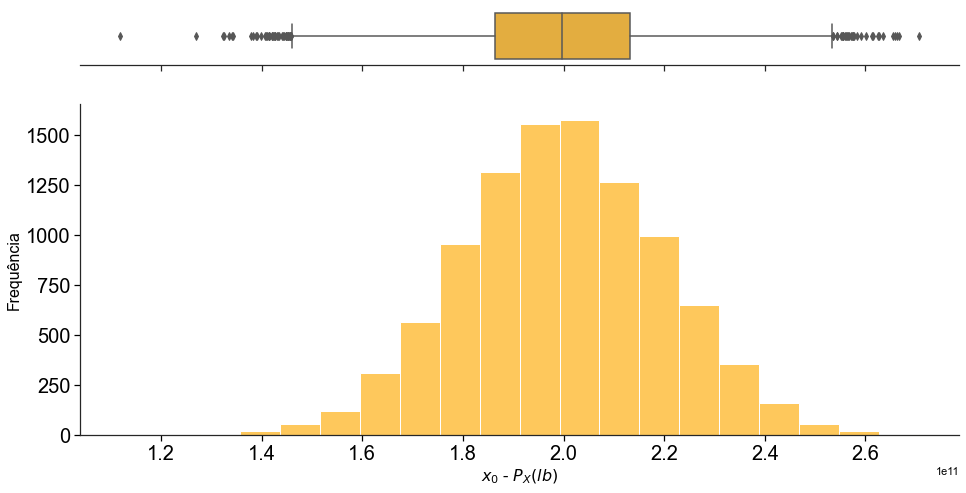

In [50]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$x_0$ - $P_X (lb)$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 20,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

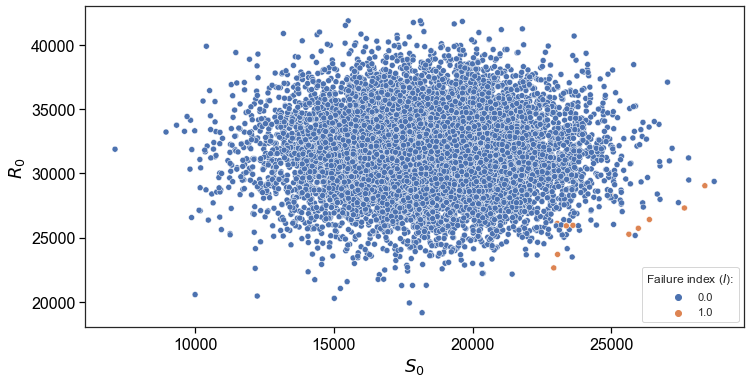

In [51]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Failure index ($I$):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

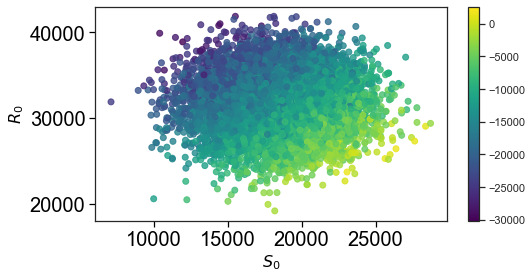

In [52]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 20,
                'Y AXIS SIZE': 20,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 16,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

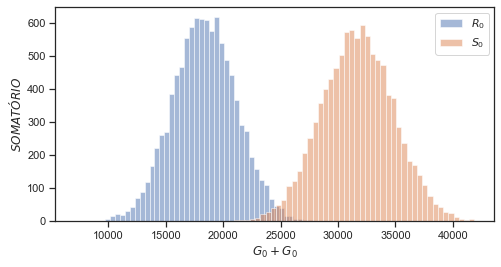

In [53]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': '$G_0 + G_0$',
                    'Y AXIS LABEL': '$SOMATÓRIO$',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

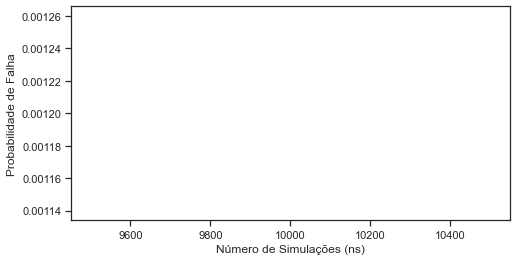

In [54]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Probabilidade de Falha',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

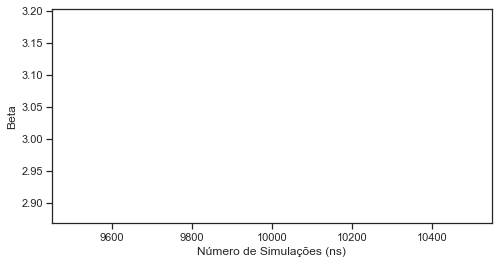

In [55]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'black',
                    'POPULATION' : POP,
                    'TYPE' : 'beta'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
10E-